### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [ ]:
#Load required packages

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
# Load data sets gives into dataframes and print for checking data

ratings=pd.read_csv('./Data.csv')
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
# Load data sets gives into dataframes and print for checking data

movie=pd.read_csv('./item.csv')
movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Load data sets gives into dataframes and print for checking data

user=pd.read_csv('./user.csv')
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [6]:
# Ratings dataset - Info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [7]:
# Ratings dataset - Shape
ratings_shape = ratings.shape
print('**********Ratings Data set Shape***********')
print(ratings_shape)


**********Ratings Data set Shape***********
(100000, 4)


In [8]:
# Ratings dataset - Describe
ratings.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


In [9]:
# Ratings dataset - Missing values
ratings.isnull().sum()
# Observed there are no missing values in ratings dataset provided

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [10]:
# Movie dataset - Info
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [11]:
# Movie dataset - Shape
movie_shape = movie.shape
print('**********Movie Data set Shape***********')
print(movie_shape)


**********Movie Data set Shape***********
(1681, 22)


In [12]:
# Movie dataset - Describe
movie.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
movie id,1681.0,841.841761,485.638077,1.0,422.0,842.0,1262.0,1682.0
unknown,1681.0,0.000595,0.024390,0.0,0.0,0.0,0.0,1.0
Action,1681.0,0.149316,0.356506,0.0,0.0,0.0,0.0,1.0
Adventure,1681.0,0.080309,0.271852,0.0,0.0,0.0,0.0,1.0
Animation,1681.0,0.024985,0.156126,0.0,0.0,0.0,0.0,1.0
Childrens,1681.0,0.072576,0.259516,0.0,0.0,0.0,0.0,1.0
Comedy,1681.0,0.300416,0.458576,0.0,0.0,0.0,1.0,1.0
Crime,1681.0,0.064842,0.246321,0.0,0.0,0.0,0.0,1.0
Documentary,1681.0,0.029744,0.169931,0.0,0.0,0.0,0.0,1.0
Drama,1681.0,0.431291,0.495404,0.0,0.0,0.0,1.0,1.0


In [13]:
# Movie dataset - Missing values
movie.isnull().sum()
# Observed there are no missing values in movie dataset provided

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [14]:
# User dataset - Info
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [15]:
# User dataset - Shape
user_shape = user.shape
print('**********User Data set Shape***********')
print(user_shape)


**********User Data set Shape***********
(943, 5)


In [16]:
# User dataset - Describe
user.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
user id,943.0,472.000000,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,34.051962,12.192740,7.0,25.0,31.0,43.0,73.0


In [17]:
# User dataset - Missing values
user.isnull().sum()
# Observed there are no missing values in user dataset provided

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [18]:
movie.columns

Index(['movie id', 'movie title', 'release date', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [19]:
movie[['unknown', 'Action','Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary','Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

In [20]:
# Another way
# Movies count per genre
# eliminate three columns as they are not generes 
tempdf = movie[[column for column in movie]] 
tempdf.iloc[:,3:21].sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
dtype: int64

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [21]:
# Compute index to drop
indexNames = movie[ movie['unknown']==1 ].index
    
# Drop index from data set
movie.drop(indexNames , axis=0, inplace=True)

# Print the shape of the dataframe 
print(movie.shape)

# Print data set
movie

(1680, 22)


,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
movie.drop(['unknown'], axis=1, inplace=True)

# Print the shape of the dataframe 
print(movie.shape)

# Print data set
movie

(1680, 21)


,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [23]:
# Display movie name, number of genres for the movie in dataframe

movie['total genres'] = movie.apply(lambda row: sum(row[0:23]==1) ,axis=1)
# save to csv for verifying
movie.loc[:,['movie title','total genres']].to_csv('./multiple_genere.csv')
#movie.loc[:,['movie title','total genres']].head()
# Below line gives full dataset
movie.loc[:,['movie title','total genres']]


,movie title,total genres
0,Toy Story,4
1,GoldenEye,3
2,Four Rooms,1
3,Get Shorty,3
4,Copycat,3
...,...,...
1676,Mat' i syn,1
1677,B. Monkey,2
1678,Sliding Doors,2
1679,You So Crazy,1


In [24]:
# print(total number of movies which have more than one genres)
print('Total number of movies which have more than one genres')
len(movie[ movie['total genres'] > 1 ])

Total number of movies which have more than one genres


849

### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [25]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


In [26]:
# Compute release year 
movie['year'] = movie['release date'].str.split('-').str[2]
movie

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total genres,year
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,4,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1676,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1998
1677,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,2,1998
1678,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,1998
1679,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,1994


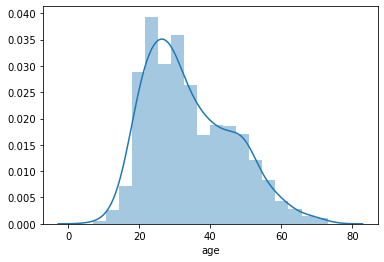

In [27]:
# Age
sns.distplot(user['age'])

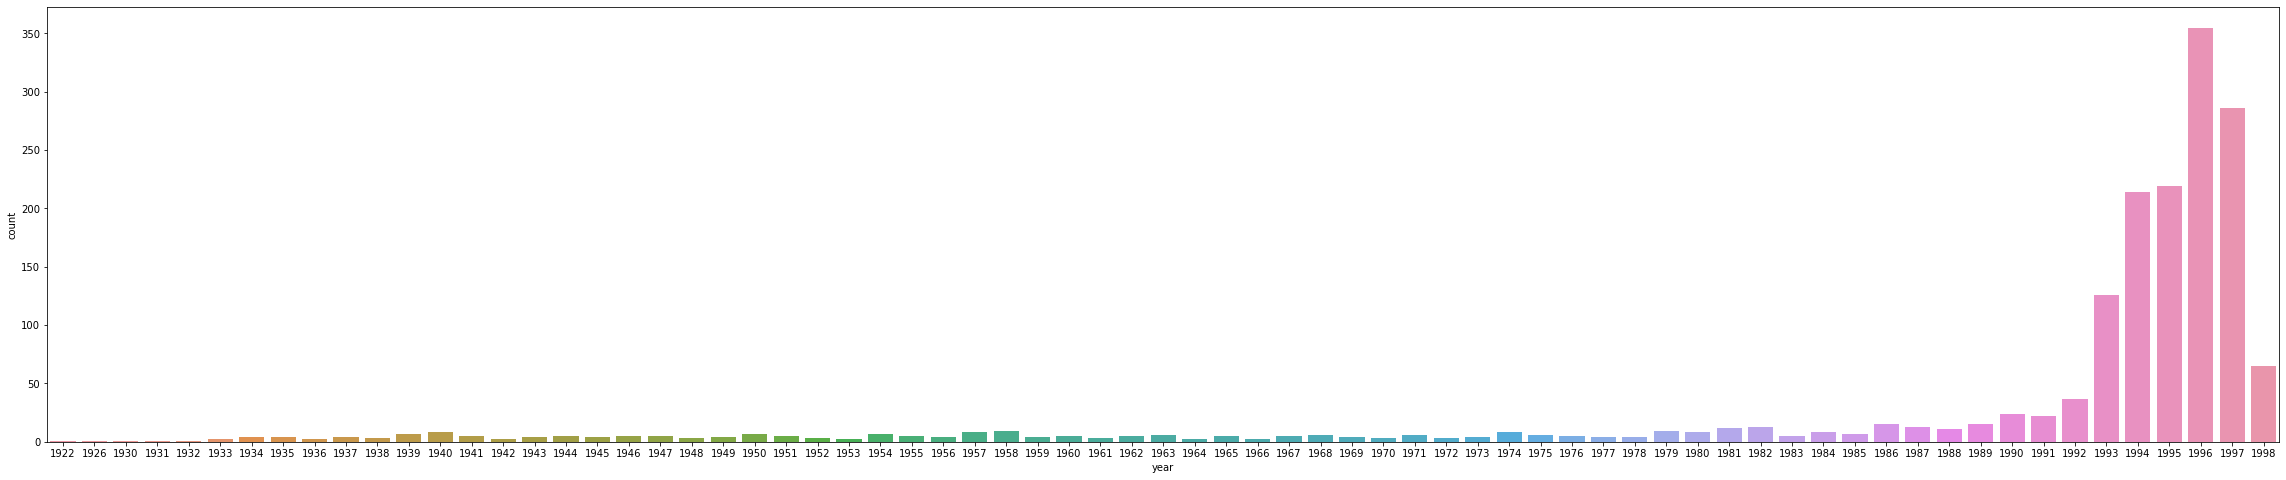

In [28]:
# Use lineplot or countplot for release year.
plt.figure(figsize=(40,8))
ax = sns.countplot(x="year", data=movie)

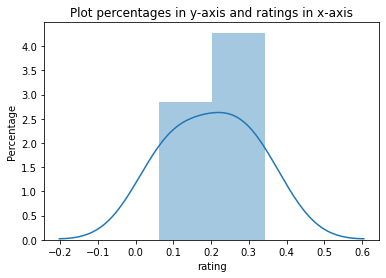

In [29]:
normalised_rating = ratings['rating'].value_counts(normalize=True)
plt.xlabel('rating')
plt.ylabel('Percentage')
plt.title('Plot percentages in y-axis and ratings in x-axis')
#plt.plot(normalised_rating)
sns.distplot(normalised_rating)

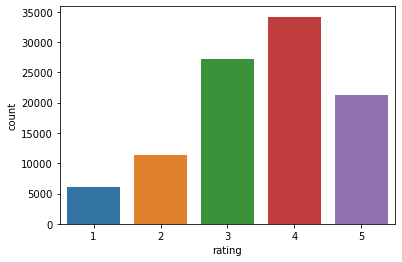

In [30]:
sns.countplot(x="rating", data=ratings)

Text(0.5, 1.0, 'Plot percentages in y-axis and gender in x-axis')

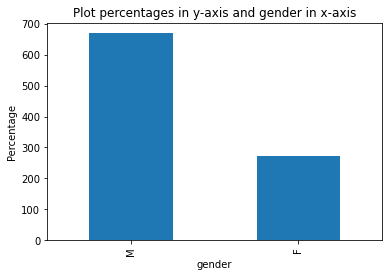

In [31]:
user['gender'].value_counts().plot(kind='bar')
plt.xlabel('gender')
plt.ylabel('Percentage')
plt.title('Plot percentages in y-axis and gender in x-axis')

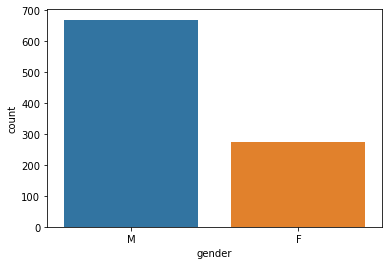

In [32]:
sns.countplot(x="gender", data=user)

Text(0.5, 1.0, 'Plot percentages in y-axis and occupation in x-axis')

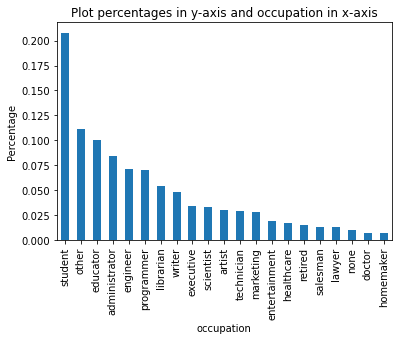

In [33]:
user['occupation'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('occupation')
plt.ylabel('Percentage')
plt.title('Plot percentages in y-axis and occupation in x-axis')

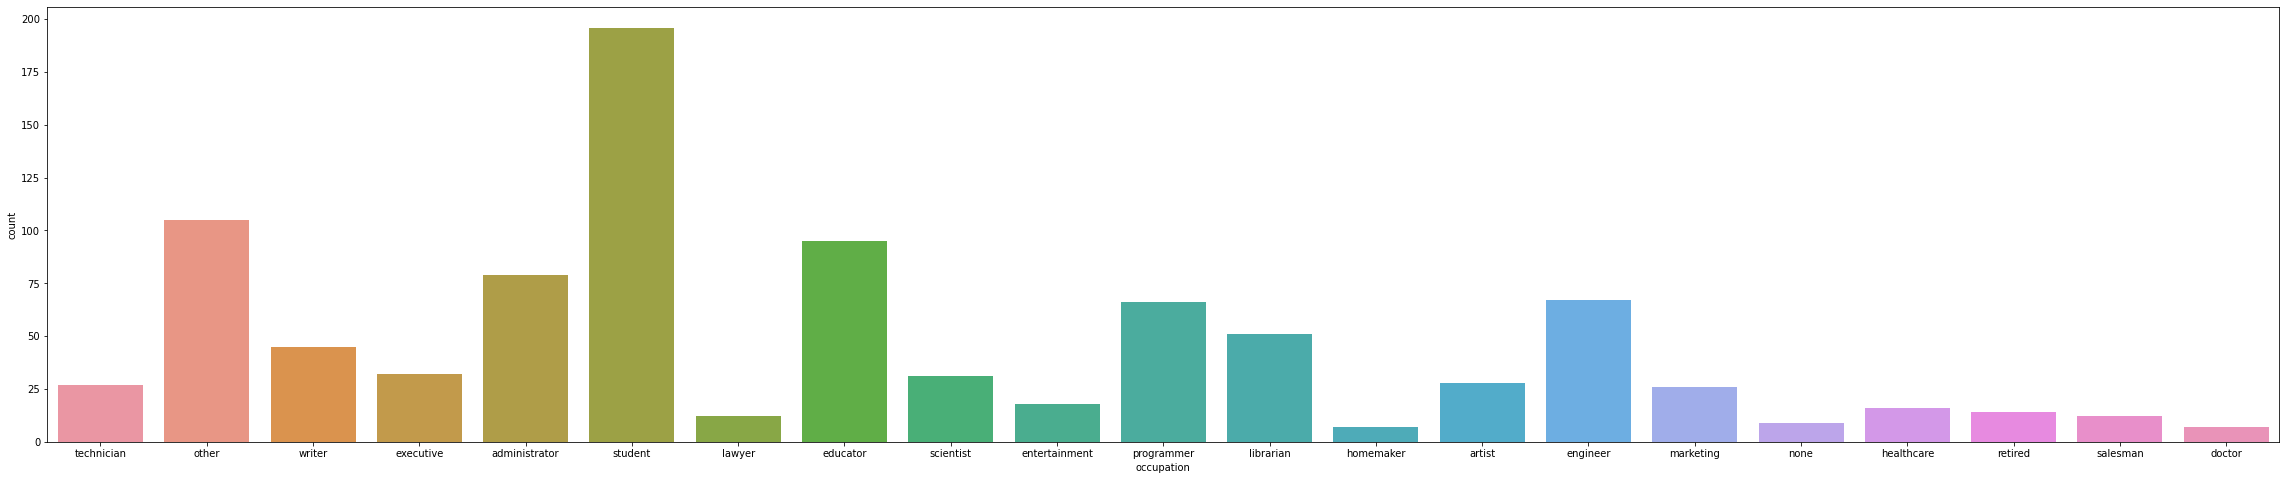

In [34]:
plt.figure(figsize=(40,8))
sns.countplot(x="occupation", data=user)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

In [35]:
df = movie.groupby('year')[['Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum().reset_index()
df['total'] = df.sum(axis=1)

# Dataframe with total column
print('Dataframe with total column')
display(df)

df_temp = df.loc[:,"Action":"Western"].div(df["total"], axis=0)
df_new = [df, df_temp]
result = pd.concat(df_new).dropna()
result.set_index(['year'], inplace=True)
popularity = result.loc[:,"Action":"Western"].div(result["total"], axis=0)

# result Dataframe with percentages
display(popularity)


Dataframe with total column


,year,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
0,1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
4,1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
67,1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
68,1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559
69,1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0,496


,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
year,,,,,,,,,,,,,,,,,,
1922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1926,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1930,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1931,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000
1932,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.084986,0.036827,0.011331,0.042493,0.232295,0.022663,0.025496,0.274788,0.008499,0.000000,0.022663,0.005666,0.005666,0.099150,0.019830,0.070822,0.019830,0.016997
1995,0.104987,0.057743,0.015748,0.055118,0.165354,0.028871,0.013123,0.233596,0.007874,0.002625,0.036745,0.007874,0.013123,0.097113,0.039370,0.102362,0.013123,0.005249
1996,0.078712,0.042934,0.016100,0.037567,0.193202,0.037567,0.032200,0.304114,0.010733,0.001789,0.019678,0.016100,0.010733,0.067979,0.026834,0.084079,0.016100,0.003578


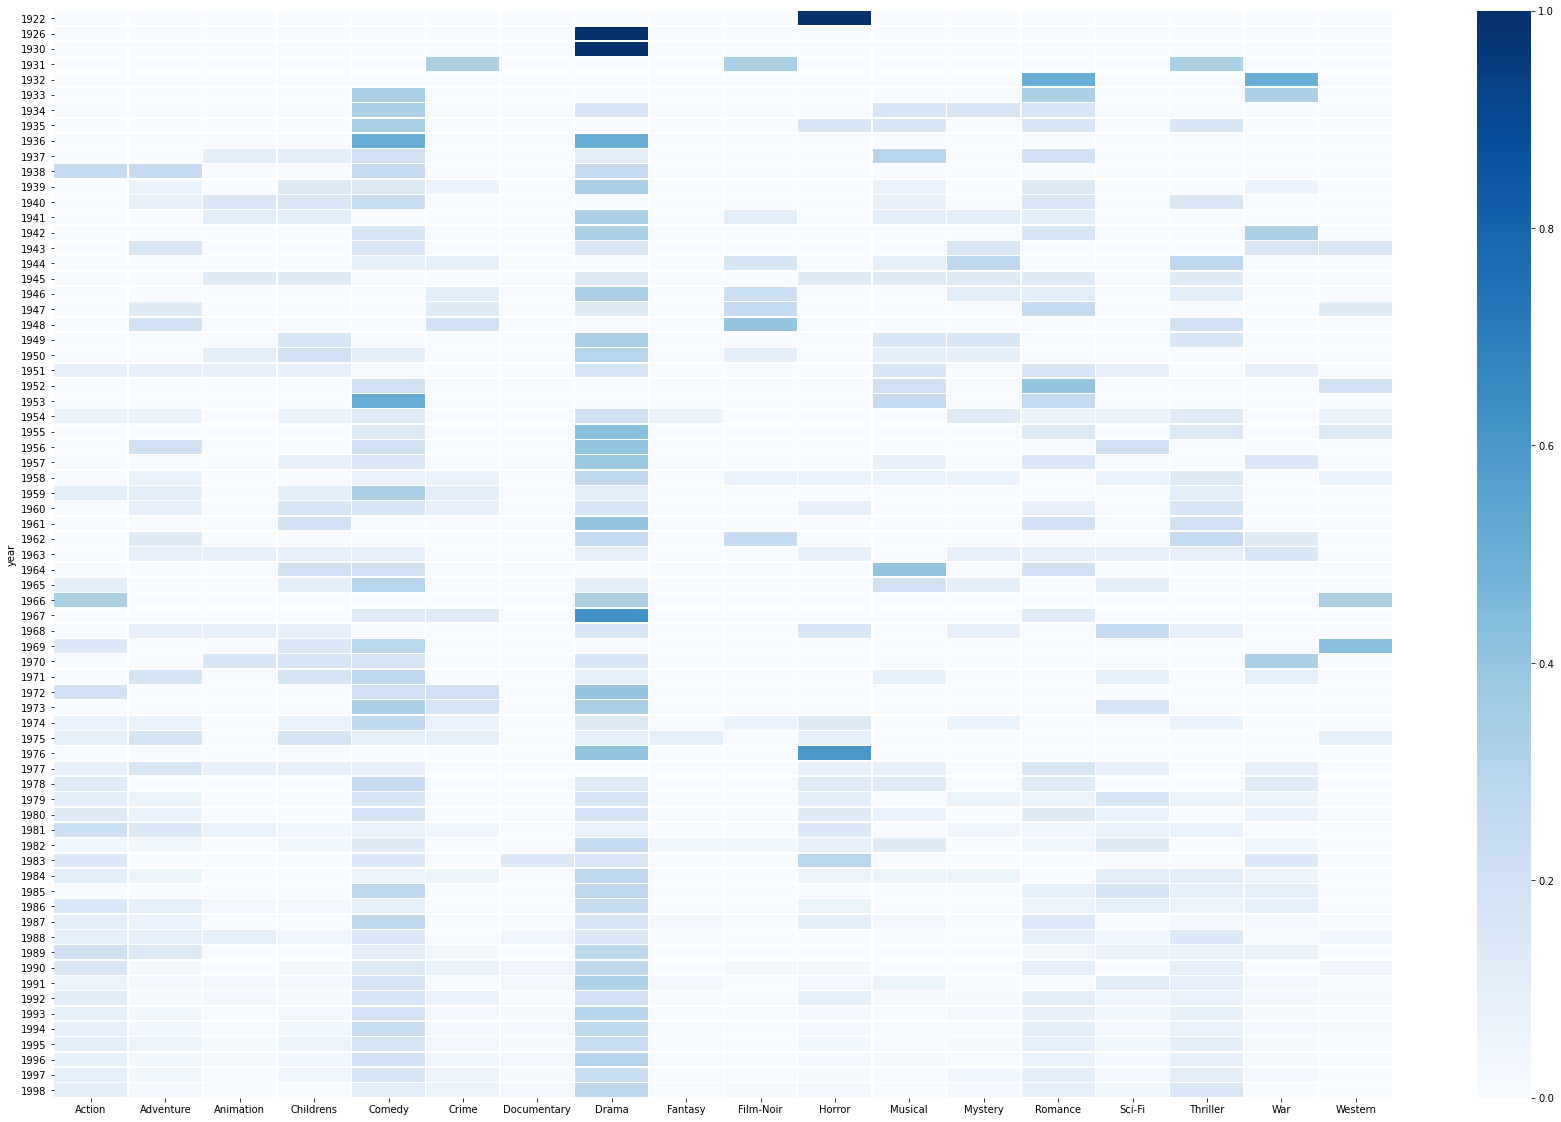

In [36]:
# Plotting figure

plt.figure(figsize=(30,20))
sns.heatmap(popularity, cmap="Blues", linewidths=.5)
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [37]:
# Getting top 25 movies according to average ratings such that each movie has number of ratings more than 100

# Merge 3 data frames
movie_ratings = pd.merge(movie, ratings)
lens = pd.merge(movie_ratings, user)

# Get count
most_rated = lens.groupby('movie id').size().sort_values(ascending=False) #[:25]
df_temp = movie_ratings.groupby('movie id')[['rating']].sum() #.reset_index()
ll = pd.merge(df_temp, most_rated.to_frame(), left_index=True, right_index=True).reset_index()

# Set column names for accessing
ll.set_axis(['movie id', 'rating', 'count'], axis=1, inplace=True)

# Calculate percentage for rating/count
ll['percentage'] = (ll['rating'] / ll['count']) *100

# Filter out columns more than 100 
a1 = ll[(ll.percentage > 100)]

# Sort dataframe
a2 = a1.sort_values(by='percentage', ascending=False)

# Merge movie data frame to fetch movie title
a3 = pd.merge(a2, movie)
a4 = a3.loc[:, 'movie id':'movie title']

# select top 25 from list
display(a4[:25])

,movie id,rating,count,percentage,movie title
0,1467,10,2,500.000000,"Saint of Fort Washington, The"
1,1599,5,1,500.000000,Someone Else's America
2,1500,10,2,500.000000,Santa with Muscles
3,1293,15,3,500.000000,Star Kid
4,1653,5,1,500.000000,Entertaining Angels: The Dorothy Day Story
5,814,5,1,500.000000,"Great Day in Harlem, A"
6,1189,15,3,500.000000,Prefontaine
7,1536,5,1,500.000000,Aiqing wansui
8,1122,5,1,500.000000,They Made Me a Criminal
9,1201,5,1,500.000000,Marlene Dietrich: Shadow and Light (


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [38]:
movie_ratings = pd.merge(movie, ratings)
lens = pd.merge(movie_ratings, user)
b1 = lens.groupby(['movie id', 'gender']).size().sort_values(ascending=False) #[:25]
b2 = movie_ratings.groupby('movie id')[['rating']].sum() #.reset_index()
b3 = pd.merge(b1.to_frame(), b2, left_index=True, right_index=True).reset_index()
b3.set_axis(['movie id', 'gender', 'count', 'total_rating'], axis=1, inplace=True)
b4 = pd.merge(movie, b3)
display(b4)
total_count = b4.groupby(['gender'])[['count']].sum().reset_index()
display(total_count)

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Romance,Sci-Fi,Thriller,War,Western,total genres,year,gender,count,total_rating
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,4,1995,M,333,1753
1,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,4,1995,F,119,1753
2,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,1,0,0,3,1995,M,112,420
3,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,1,0,0,3,1995,F,19,420
4,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,1,0,0,1,1995,M,74,273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3131,1678,Mat' i syn,06-Feb-1998,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1998,M,1,1
3132,1679,B. Monkey,06-Feb-1998,0,0,0,0,0,0,0,...,1,0,1,0,0,2,1998,M,1,3
3133,1680,Sliding Doors,01-Jan-1998,0,0,0,0,0,0,0,...,1,0,0,0,0,2,1998,M,1,2
3134,1681,You So Crazy,01-Jan-1994,0,0,0,0,1,0,0,...,0,0,0,0,0,1,1994,M,1,3


,gender,count
0,F,25738
1,M,74252


In [39]:

cp = b4.copy()
cp.drop(['movie title', 'release date', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary','Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
        'Thriller', 'War', 'Western', 'total genres',
       'year'], axis=1, inplace=True)
display(cp)

drama_count = cp.copy()
drama_count.drop(['Romance','Sci-Fi'], axis=1, inplace=True)
drama_count.drop(drama_count[(drama_count['Drama'] == 0)].index, inplace=True)
drama_count_final = drama_count.groupby(['gender'])[['count']].sum().reset_index()
display('Drama counts')
display(drama_count_final)

romance_count = cp.copy()
romance_count.drop(['Drama','Sci-Fi'], axis=1, inplace=True)
romance_count.drop(romance_count[(romance_count['Romance'] == 0)].index, inplace=True)
romance_count_final = romance_count.groupby(['gender'])[['count']].sum().reset_index()
display('Romance counts')
display(romance_count_final)

scfi_count = cp.copy()
scfi_count.drop(['Drama','Romance'], axis=1, inplace=True)
scfi_count.drop(scfi_count[(scfi_count['Sci-Fi'] == 0)].index, inplace=True)
scfi_count_final = scfi_count.groupby(['gender'])[['count']].sum().reset_index()
display('Sci-Fi counts')
display(scfi_count_final)

,movie id,Drama,Romance,Sci-Fi,gender,count,total_rating
0,1,0,0,0,M,333,1753
1,1,0,0,0,F,119,1753
2,2,0,0,0,M,112,420
3,2,0,0,0,F,19,420
4,3,0,0,0,M,74,273
...,...,...,...,...,...,...,...
3131,1678,1,0,0,M,1,1
3132,1679,0,1,0,M,1,3
3133,1680,1,1,0,M,1,2
3134,1681,0,0,0,M,1,3


'Drama counts'

,gender,count
0,F,11008
1,M,28887


'Romance counts'

,gender,count
0,F,5858
1,M,13603


'Sci-Fi counts'

,gender,count
0,F,2629
1,M,10101


In [40]:

drama_f = (drama_count_final['count'].loc[0]/total_count['count'].loc[0]) * 100
display(drama_f)
drama_m = (drama_count_final['count'].loc[1]/total_count['count'].loc[1]) * 100
display(drama_m)

romance_f = (romance_count_final['count'].loc[0]/total_count['count'].loc[0]) * 100
display(romance_f)
romance_m = (romance_count_final['count'].loc[1]/total_count['count'].loc[1]) * 100
display(romance_m)

sc_f = (scfi_count_final['count'].loc[0]/total_count['count'].loc[0]) * 100
display(sc_f)
sc_m = (scfi_count_final['count'].loc[1]/total_count['count'].loc[1]) * 100
display(sc_m)

42.76944595539669

38.90400258578893

22.760121221540135

18.320045251306365

10.214468878700753

13.603673975111782

In [41]:
#Observations

display('Men watch more drama than women is FALSE')
display('Women watch more Sci-Fi than men is FALSE')
display('Men watch more Romance than women is FALSE')


'Men watch more drama than women is FALSE'

'Women watch more Sci-Fi than men is FALSE'

'Men watch more Romance than women is FALSE'